In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted
import os

In [33]:
# settings
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches
font_size = 10

# Single run plot

In [4]:
#loading noise dataframes
df_noise = []
for file in natsorted(filter(lambda x: x.find('noise') != -1, os.listdir('runs/'))):
    path = os.path.join('runs/', file)
    df_noise.append(load_tensorboard(path))
    
#loading sparsity dataframes
df_nx = []
for file in natsorted(filter(lambda x: x.find('nx') != -1, os.listdir('runs/'))):
    path = os.path.join('runs/', file)
    df_nx.append(load_tensorboard(path))

In [26]:
prior_keys = natsorted(filter(lambda key: key.find('alpha') == 0, df_noise[0].keys()))

final_prior_noise = np.stack([df[prior_keys].loc[df.BIC.idxmin()] for df in df_noise], axis=0)
final_prior_nx = np.stack([df[prior_keys].loc[df.BIC.idxmin()] for df in df_nx], axis=0)

In [27]:
final_prior_noise.shape

(11, 12)

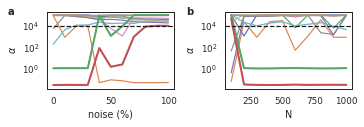

In [38]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(0.9 * col_width, 0.3 * col_width), constrained_layout=True)

ax = axes[0]
ax.plot(np.arange(0, 101, 10), final_prior_noise)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 3], lw=2)
ax.plot(np.arange(0, 101, 10), final_prior_noise[:, 5], lw=2)
ax.set_yscale('log')
ax.axhline(1e4, color='k', linestyle='--')
##ax.set_xscale('log')
ax.set_xlabel('noise (%)')
ax.set_ylabel(r'$\alpha$')
#ax.set_title('Prior as function of noise')
#ax.set_ylabel("Loss")
#ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
#ax.legend()
ax.text(-40, 1e5, 'a', fontdict={'weight':'bold', 'size': font_size})


ax = axes[1]
ax.plot(np.arange(100, 1001, 100), final_prior_nx)
ax.plot(np.arange(100, 1001, 100), final_prior_nx[:, 3], lw=2)
ax.plot(np.arange(100, 1001, 100), final_prior_nx[:, 5], lw=2)
ax.axhline(1e4, color='k', linestyle='--')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel(r'$\alpha$')
#ax.set_title('Prior as function of dataset size')
#ax.ticklabel_format(axis='x', style='sci', scilimits=[0, 0])
ax.text(-250, 1e5, 'b', fontdict={'weight':'bold', 'size': font_size})

plt.savefig('sbl_experiments.pdf', bbox_inches='tight')